# Import modules and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

In [23]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: uber.csv                


In [24]:
# Create DataFrame
uber = pd.read_csv('uber.csv')
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Data Preprocessing

In [4]:
# Drop unnecessary columns
uber.drop(columns=['Unnamed: 0', 'key'], axis=0, inplace=True)
uber.sort_values(by='pickup_datetime', axis=0, inplace=True)
uber.reset_index(inplace=True, drop=True)
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,8.5,2009-01-01 01:15:22 UTC,-73.981918,40.779456,-73.957685,40.771043,2
1,13.0,2009-01-01 01:59:17 UTC,-73.983759,40.721389,-73.994833,40.687179,2
2,10.6,2009-01-01 02:05:03 UTC,-73.956635,40.771254,-73.991528,40.749778,2
3,12.2,2009-01-01 02:09:13 UTC,-73.984605,40.728020,-73.955746,40.776830,1
4,11.0,2009-01-01 02:13:41 UTC,-73.980127,40.737425,-74.009544,40.726025,4
...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53 UTC,-73.971703,40.782207,-73.943680,40.827991,2
199996,25.5,2015-06-30 23:16:42 UTC,-74.001099,40.730961,-73.957123,40.806908,2
199997,20.0,2015-06-30 23:31:06 UTC,-73.999962,40.733135,-73.962448,40.773041,4
199998,8.5,2015-06-30 23:33:33 UTC,-73.980988,40.762020,-73.960083,40.770531,1


In [5]:
# Convert shape of 'pickup_datetime' into 'Datetime64'
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4
...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1


In [6]:
# Extract year, month, day and hour from 'pickup_datetime'
uber['pickup_datetime_year'] = uber['pickup_datetime'].dt.year
uber['pickup_datetime_month'] = uber['pickup_datetime'].dt.month
uber['pickup_datetime_day'] = uber['pickup_datetime'].dt.day
uber['pickup_datetime_hour'] = uber['pickup_datetime'].dt.hour
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,2009,1,1,1
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,2009,1,1,1
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2009,1,1,2
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,2009,1,1,2
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,2009,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,2015,6,30,22
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,2015,6,30,23
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,2015,6,30,23
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,2015,6,30,23


In [7]:
# Check for any missing values
uber.isnull().sum()

fare_amount              0
pickup_datetime          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        1
dropoff_latitude         1
passenger_count          0
pickup_datetime_year     0
pickup_datetime_month    0
pickup_datetime_day      0
pickup_datetime_hour     0
dtype: int64

In [8]:
# Drop NaN rows
uber.dropna(axis=0, inplace=True)
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,2009,1,1,1
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,2009,1,1,1
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2009,1,1,2
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,2009,1,1,2
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,2009,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,2015,6,30,22
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,2015,6,30,23
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,2015,6,30,23
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,2015,6,30,23


In [9]:
# Utility Function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1.values)
    lat1 = np.radians(lat1.values)
    lon2 = np.radians(lon2.values)
    lat2 = np.radians(lat2.values)

    #Implementing Haversine Formula:
    dlon = np.subtract(lon2, lon1)
    dlat = np.subtract(lat2, lat1)

    a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),
               np.multiply(np.cos(lat1),
                           np.multiply(np.cos(lat2),
                                       np.power(np.sin(np.divide(dlon, 2)), 2))))
    c = np.multiply(2, np.arcsin(np.sqrt(a)))
    r = 6371

    return c*r

In [10]:
uber['distance'] = haversine(uber['pickup_longitude'], uber['pickup_latitude'], uber['dropoff_longitude'], uber['dropoff_latitude'])
uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,2009,1,1,1,2.244765
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,2009,1,1,1,3.916842
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2009,1,1,2,3.786736
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,2009,1,1,2,5.946957
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,2009,1,1,2,2.784022
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,2015,6,30,22,5.610774
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,2015,6,30,23,9.221234
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,2015,6,30,23,5.447442
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,2015,6,30,23,1.998738


In [11]:
uber = uber[['pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day', 'pickup_datetime_hour', 'passenger_count', 'distance', 'fare_amount']]
uber

,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,passenger_count,distance,fare_amount
0,2009,1,1,1,2,2.244765,8.5
1,2009,1,1,1,2,3.916842,13.0
2,2009,1,1,2,2,3.786736,10.6
3,2009,1,1,2,1,5.946957,12.2
4,2009,1,1,2,4,2.784022,11.0
...,...,...,...,...,...,...,...
199995,2015,6,30,22,2,5.610774,18.5
199996,2015,6,30,23,2,9.221234,25.5
199997,2015,6,30,23,4,5.447442,20.0
199998,2015,6,30,23,1,1.998738,8.5


In [12]:
uber_year = uber[['pickup_datetime_year', 'passenger_count', 'distance', 'fare_amount']].groupby(by=['pickup_datetime_year'], sort=True).mean()
uber_month = uber[['pickup_datetime_month', 'passenger_count', 'distance', 'fare_amount']].groupby(by=['pickup_datetime_month'], sort=True).mean()
uber_day = uber[['pickup_datetime_day', 'passenger_count', 'distance', 'fare_amount']].groupby(by=['pickup_datetime_day'], sort=True).mean()
uber_hour = uber[['pickup_datetime_hour', 'passenger_count', 'distance', 'fare_amount']].groupby(by=['pickup_datetime_hour'], sort=True).mean()

# Visualization

In [13]:
features = ['passenger_count', 'distance', 'fare_amount']

## Year

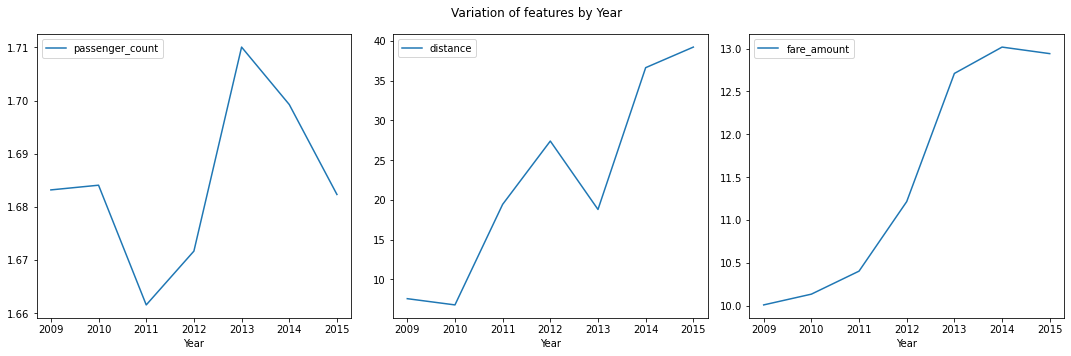

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(features):
    cols=i%3
    uber_year[feature].plot.line(ax=axs[cols])
    axs[i].legend(loc=2)
    axs[i].set_xlabel("Year")

plt.suptitle('Variation of features by Year')
plt.tight_layout()
plt.show()

## Month

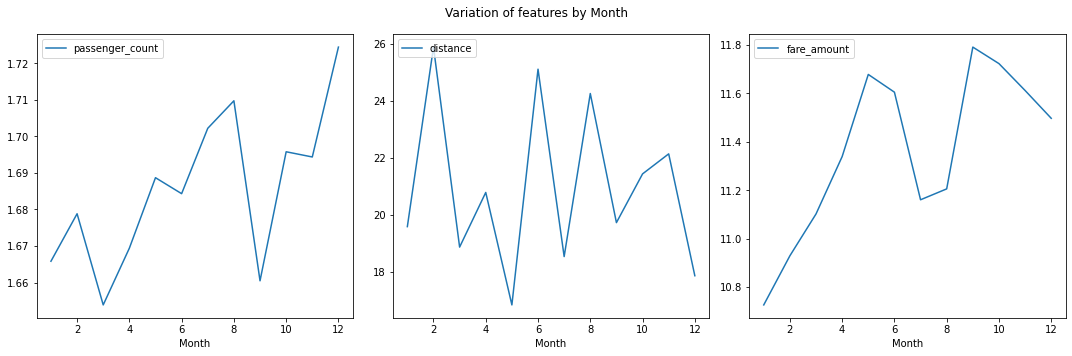

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(features):
    cols=i%3
    uber_month[feature].plot.line(ax=axs[cols])
    axs[i].legend(loc=2)
    axs[i].set_xlabel("Month")

plt.suptitle('Variation of features by Month')
plt.tight_layout()
plt.show()

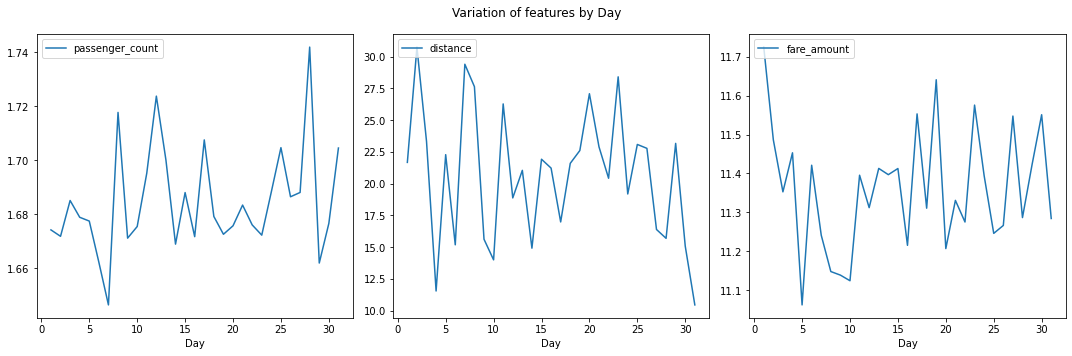

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(features):
    cols=i%3
    uber_day[feature].plot.line(ax=axs[cols])
    axs[i].legend(loc=2)
    axs[i].set_xlabel("Day")

plt.suptitle('Variation of features by Day')
plt.tight_layout()
plt.show()

## Hour

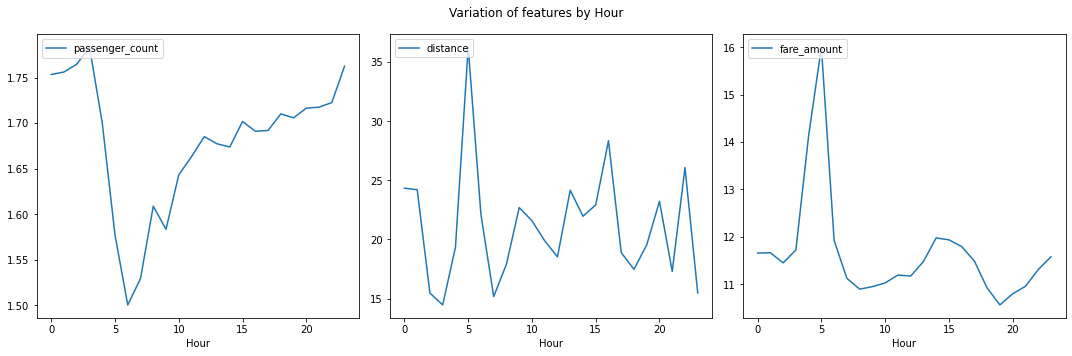

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(features):
    cols=i%3
    uber_hour[feature].plot.line(ax=axs[cols])
    axs[i].legend(loc=2)
    axs[i].set_xlabel("Hour")

plt.suptitle('Variation of features by Hour')
plt.tight_layout()
plt.show()

# Regression

In [18]:
# Process scaling for DataFrame
scaler = MinMaxScaler()
scaler.fit(uber)
uber_scaled = scaler.transform(uber)
uber_scaled = pd.DataFrame(uber_scaled)
uber_scaled

,0,1,2,3,4,5,6
0,0.0,0.000000,0.000000,0.043478,0.009615,0.000137,0.109800
1,0.0,0.000000,0.000000,0.043478,0.009615,0.000239,0.117967
2,0.0,0.000000,0.000000,0.086957,0.009615,0.000231,0.113612
3,0.0,0.000000,0.000000,0.086957,0.004808,0.000362,0.116515
4,0.0,0.000000,0.000000,0.086957,0.019231,0.000170,0.114338
...,...,...,...,...,...,...,...
199994,1.0,0.454545,0.966667,0.956522,0.009615,0.000342,0.127949
199995,1.0,0.454545,0.966667,1.000000,0.009615,0.000562,0.140653
199996,1.0,0.454545,0.966667,1.000000,0.019231,0.000332,0.130672
199997,1.0,0.454545,0.966667,1.000000,0.004808,0.000122,0.109800


In [19]:
# Split datasets
X = uber_scaled.iloc[:, :6]
y = uber_scaled.iloc[:, 6]
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (159999, 6)
Shape of X_test:  (40000, 6)
Shape of y_train:  (159999,)
Shape of y_test:  (40000,)


In [20]:
# Utility Function
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__, np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [22]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
get_rmse(lr_reg)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
# Accuracy Score
print('Accuracy Score of Logistic Regression by train set', np.round(lr_reg.score(X_train, y_train), 3))
print('Accuracy Score of Logistic Regression by test set', np.round(lr_reg.score(X_test, y_test), 3))